# Plot Market Data in Capon Theme
---

In [1]:
import themes

themes.register()

## The Data

In [7]:
from themes import datasets

help(datasets.load_markets)

Help on function load_markets in module themes.datasets:

load_markets()
    https://github.com/gialdetti/capon/



In [8]:
markets = datasets.load_markets() \
    .pipe(lambda df: df[df['timestamp']>'2020']) \
    .assign(relative_price=lambda df: df.groupby('symbol')['close'].transform(lambda g: g/g.iloc[0] - 1))
markets

,timestamp,symbol,currency,volume,open,high,low,close,adjclose,relative_price
1907,2020-01-02 10:30:00-04:00,^GSPC,USD,3458250000,3244.669922,3258.139893,3235.530029,3257.850098,3257.850098,0.000000
1908,2020-01-03 10:30:00-04:00,^GSPC,USD,3461290000,3226.360107,3246.149902,3222.340088,3234.850098,3234.850098,-0.007060
1909,2020-01-06 10:30:00-04:00,^GSPC,USD,3674070000,3217.550049,3246.840088,3214.639893,3246.280029,3246.280029,-0.003551
1910,2020-01-07 10:30:00-04:00,^GSPC,USD,3420380000,3241.860107,3244.909912,3232.429932,3237.179932,3237.179932,-0.006345
1911,2020-01-08 10:30:00-04:00,^GSPC,USD,3720890000,3238.590088,3267.070068,3236.669922,3253.050049,3253.050049,-0.001473
...,...,...,...,...,...,...,...,...,...,...
10059,2022-05-25 09:30:00-04:00,^RUT,USD,4322190000,1760.420044,1807.430054,1759.199951,1799.160034,1799.160034,0.079429
10060,2022-05-26 09:30:00-04:00,^RUT,USD,3961940000,1808.640015,1847.829956,1808.640015,1838.239990,1838.239990,0.102876
10061,2022-05-27 09:30:00-04:00,^RUT,USD,3560560000,1845.239990,1887.900024,1845.239990,1887.900024,1887.900024,0.132670
10062,2022-05-31 09:30:00-04:00,^RUT,USD,5192220000,1882.000000,1883.189941,1856.560059,1864.040039,1864.040039,0.118355


## Plot with Altair

In [3]:
import altair as alt

In [4]:
with alt.themes.enable('capon'):
    chart = alt.Chart(markets).mark_line().encode(
        x='timestamp',
        y=alt.Y('relative_price', axis=alt.Axis(format='+%')),
        color='symbol',
        tooltip=['timestamp', 'symbol', alt.Tooltip('relative_price', format='+.2%')],
    ).properties(
        title=f"Market Indexes Change (relative to {markets['timestamp'].dt.date.min()}))",
        width=800,
        height=300,
    )
    
    display(chart)

alt.Chart(...)

## Plot with Matplotlib

In [5]:
import matplotlib.pyplot as plt

plt.figure();   # Hack to overcome mpl bug of delaying with figure.facecolor update

<Figure size 432x288 with 0 Axes>

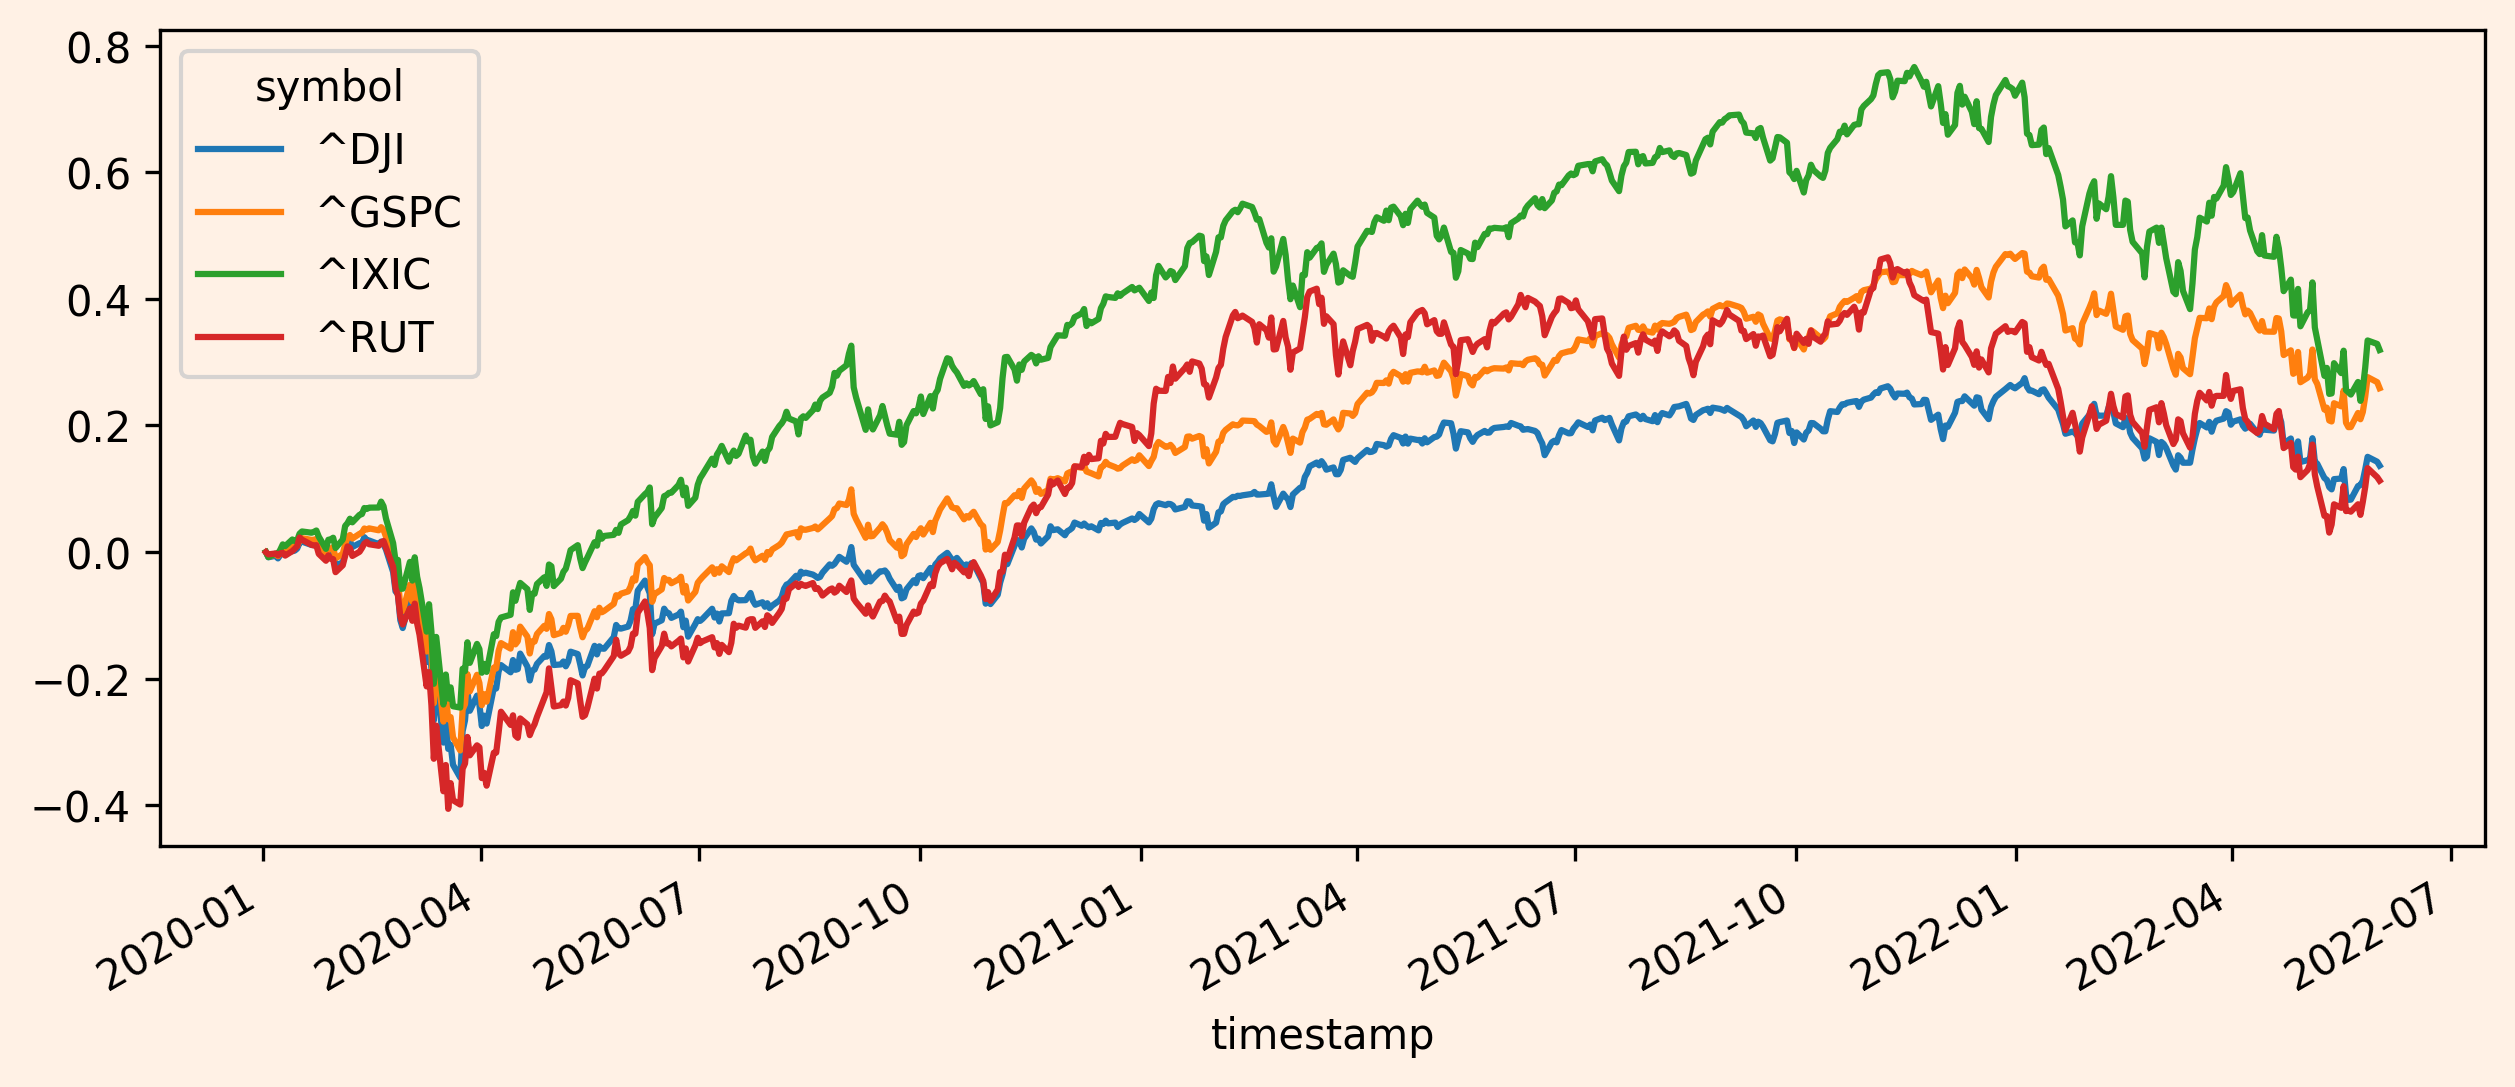

In [6]:
with plt.style.context('capon'):
    plt.figure(figsize=(10, 4), dpi=300)
#     print(plt.rcParams['figure.facecolor'])
    markets.pivot_table(index='timestamp', columns='symbol', values='relative_price').plot(ax=plt.gca())